In [1]:
import numpy as np
import json
from itertools import product

In [2]:
data = json.load(open("output.json"))

In [3]:
current_data = data["active"]["current"]
current_matrix = np.array(current_data["JM"])

transport_data = data["active"]["TransportXS"]
transportXS_matrix = np.array(transport_data["transportXS"])
totalXS_matrix = np.array(transport_data["totalXS"])
raw_scatterXS = np.array(transport_data["scatterXS"])
scatterXS_matrix = np.array(transport_data["scatteringProductionXS"])
fissionXS_matrix = np.array(transport_data["fissionProductionXS"])
raw_fissionXS = np.array(transport_data["fissionXS"])
nu_bar_matrix = np.array(transport_data["nuBar"])
flux_matrix = np.array(data["active"]["fluxMap"]["Res"])

# TODO: properly extract spacing
spacing = [2, 5, 2]

beta = 0

In [4]:
flux_matrix.shape

(5, 20, 5, 1, 1, 2)

In [5]:
current_max_x = len(current_data["XBounds"]) + 1
current_max_y = len(current_data["YBounds"]) + 1
current_max_z = len(current_data["ZBounds"]) + 1
current_max_energy_group = len(transport_data["EnergyBounds"][0])

mesh_size_x = len(current_data["XBounds"])
mesh_size_y = len(current_data["YBounds"])
mesh_size_z = len(current_data["ZBounds"])

In [6]:
print(current_matrix.shape)
print(flux_matrix.shape)
print(transportXS_matrix.shape)

print(scatterXS_matrix.shape)
print(fissionXS_matrix.shape)

print()

for i0, i0_l in enumerate(current_matrix):
    for i1, i1_l in enumerate(i0_l):
        for i2, i2_l in enumerate(i1_l):
            for i3, i3_l in enumerate(i2_l):
                for i4, i4_l in enumerate(i3_l):
                    for i5, i5_l in enumerate(i4_l):
                        if current_matrix[i0, i1, i2, i3, i4, i5]:
                            print(i0, i1, i2, i3, i4, i5, current_matrix[i0, i1, i2, i3, i4, i5])


(1, 3, 6, 21, 6, 2)
(5, 20, 5, 1, 1, 2)
(5, 20, 5, 1, 2)
(5, 20, 5, 1, 1, 2)
(5, 20, 5, 1, 1, 2)

0 0 1 1 0 0 -6.36328
0 0 1 1 0 1 0.257778
0 0 1 1 1 0 -1.34116
0 0 1 1 1 1 0.137056
0 0 1 1 2 0 0.418751
0 0 1 1 2 1 0.177682
0 0 1 1 3 0 2.6513
0 0 1 1 3 1 0.163117
0 0 1 1 4 0 4.12871
0 0 1 1 4 1 0.138435
0 0 1 1 5 0 4.44855
0 0 1 1 5 1 0.133769
0 0 1 2 0 0 -11.367
0 0 1 2 0 1 0.349028
0 0 1 2 1 0 -2.0362
0 0 1 2 1 1 0.184953
0 0 1 2 2 0 0.813687
0 0 1 2 2 1 0.244661
0 0 1 2 3 0 5.24906
0 0 1 2 3 1 0.224028
0 0 1 2 4 0 8.31034
0 0 1 2 4 1 0.229708
0 0 1 2 5 0 8.72926
0 0 1 2 5 1 0.231283
0 0 1 3 0 0 -9.9485
0 0 1 3 0 1 0.291587
0 0 1 3 1 0 -1.9987
0 0 1 3 1 1 0.184314
0 0 1 3 2 0 0.613695
0 0 1 3 2 1 0.198279
0 0 1 3 3 0 4.28061
0 0 1 3 3 1 0.165668
0 0 1 3 4 0 7.00995
0 0 1 3 4 1 0.234335
0 0 1 3 5 0 7.12651
0 0 1 3 5 1 0.177787
0 0 1 4 0 0 -10.4911
0 0 1 4 0 1 0.283829
0 0 1 4 1 0 -1.99105
0 0 1 4 1 1 0.20704
0 0 1 4 2 0 0.563075
0 0 1 4 2 1 0.218909
0 0 1 4 3 0 4.96393
0 0 1 4 3 1 0.2

In [7]:
def print_matrix(matrix):
    return
    for row in matrix:
        for item in row:
            rounded = round(item, 4)
            if item == 0:
                print(f"{'--':<8}", end=" ")
            else:
                print(f"{rounded:<8}", end=" ")
        print("\n")

In [8]:
def get_current_on_cell_boundary_plus_half(direction, x, y, z, energy_group):
    # coord, direction, energy, mean/ std
    return current_matrix[energy_group, direction, x + 1, y + 1, z + 1, 0]

def get_flux_at_coordinate(x, y, z, energy_group):
    return flux_matrix[z, y, x, energy_group, 0, 0] / (spacing[0] * spacing[1] * spacing[2])

def get_transportXS_at_coordinate(x, y, z, energy_group):
    return transportXS_matrix[z, y, x, energy_group, 0]

def get_totalXS_at_coordinate(x, y, z, energy_group):
    return totalXS_matrix[z, y, x, energy_group, 0]

def get_scatter_xs(energy_to, energy_from, x, y, z):
    # TODO: check this
    return scatterXS_matrix[z, y, x, energy_from, energy_to, 0]

def get_raw_scatter_xs(energy, x, y, z):
    # TODO: check this
    return raw_scatterXS[z, y, x, energy, 0]

def get_raw_fission_xs(energy, x, y, z):
    # TODO: check this
    return raw_fissionXS[z, y, x, energy, 0]

def get_nu_bar(energy, x, y, z):
    # TODO: check this
    return nu_bar_matrix[z, y, x, energy, 0]

def get_fission_xs(energy_to, energy_from, x, y, z):
    # TODO: check this
    return fissionXS_matrix[z, y, x, energy_from, energy_to, 0]

In [9]:
print(get_raw_scatter_xs(0, 0, 5, 0))
print(get_scatter_xs(0, 0, 0, 5, 0))

print()

print(get_raw_fission_xs(0, 0, 5, 0))
print(get_fission_xs(0, 0, 0, 5, 0))
print(get_nu_bar(0, 0, 5, 0))

print()

print(get_transportXS_at_coordinate(0, 5, 0, 0))
print(get_totalXS_at_coordinate(0, 5, 0, 0))

3.32483
3.3254

0.162386
0.162386
2.47622

1.4465
3.54165


In [10]:
# Calculate k_inf
# Do I need to remove scattering multiplicity here?
absorption_xs = get_totalXS_at_coordinate(0, 5, 0, 0) - get_scatter_xs(0, 0, 0, 5, 0)
print(absorption_xs)

# Assume utilization factor = 1

eta = get_nu_bar(0, 0, 5, 0) * get_fission_xs(0, 0, 0, 5, 0) / absorption_xs
k_inf = eta * absorption_xs
print(eta)

0.21625000000000005
1.859437969572254


In [11]:
diffusion_coefficient = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    transport_XS = get_transportXS_at_coordinate(x, y, z, energy)
    assert transport_XS > 0
    diffusion_coefficient[x, y, z, energy] = 1.0 / (3.0 * transport_XS)


In [12]:
def build_linear_diffusive_term(direction):
    linear_diffusive_term_positive = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    linear_diffusive_term_negative = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        D = diffusion_coefficient[x, y, z, energy]

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]

        if is_on_low_boundary:
            coupling = (2 * D * (1 - beta)) / (4 * D * (1 + beta) + (1 - beta) * spacing[direction])
        else:
            D_minus_1 = diffusion_coefficient[x - delta_x, y - delta_y, z - delta_z, energy]
            coupling = (2 * D_minus_1 * D) / ((D_minus_1 + D) * spacing[direction])

        linear_diffusive_term_negative[x, y, z, energy] = coupling

        if is_on_high_boundary:
            coupling = (2 * D * (1 - beta)) / (4 * D * (1 + beta) + (1 - beta) * spacing[direction])
        else:
            D_plus_1 = diffusion_coefficient[x + delta_x, y + delta_y, z + delta_z, energy]
            coupling = (2 * D_plus_1 * D) / ((D_plus_1 + D) * spacing[direction])
        
        linear_diffusive_term_positive[x, y, z, energy] = coupling
    return linear_diffusive_term_negative, linear_diffusive_term_positive

In [13]:
POSITIVE_DIR = 1
NEGATIVE_DIR = 0
linear_diffusive_terms = [build_linear_diffusive_term(0), build_linear_diffusive_term(1), build_linear_diffusive_term(2)]

print(linear_diffusive_terms[1][POSITIVE_DIR].T)

print(linear_diffusive_terms[1][NEGATIVE_DIR].T)

[[[[0.0454746  0.04430665 0.04426429 0.04444281 0.04635166]
   [0.04548204 0.04448626 0.04369779 0.04431784 0.04589061]
   [0.04539332 0.04459891 0.04374582 0.04436562 0.04574639]
   [0.04544871 0.04471857 0.04406111 0.04444993 0.04573462]
   [0.04570013 0.0442113  0.0443826  0.0442737  0.04557999]
   [0.04579698 0.04381123 0.04438142 0.04405267 0.04612684]
   [0.04558903 0.04426164 0.04389806 0.04412921 0.0460135 ]
   [0.04587009 0.04432801 0.04362045 0.04436385 0.04553905]
   [0.04577041 0.04421453 0.04397827 0.04448225 0.04564522]
   [0.04524912 0.04411914 0.04418405 0.04438423 0.04581602]
   [0.04538698 0.04402213 0.0440799  0.04422817 0.04598145]
   [0.0458272  0.04443704 0.04420588 0.04423727 0.04566132]
   [0.04607297 0.0445995  0.04410586 0.04430606 0.04550113]
   [0.04582106 0.0443096  0.04408544 0.04419958 0.04585068]
   [0.04582689 0.04395348 0.04398742 0.0441507  0.0458165 ]
   [0.04614648 0.04414149 0.044055   0.04418932 0.04546266]
   [0.04627059 0.04439975 0.04439413 0.0

In [14]:
def build_non_linear_diffusive_term(direction):
    non_linear_diffusive_term_positive = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    non_linear_diffusive_term_negative = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        flux = get_flux_at_coordinate(x, y, z, energy)

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]

        J_minus_half_tallied = get_current_on_cell_boundary_plus_half(direction, x - delta_x, y - delta_y, z - delta_z, energy)
        D_linear = linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]

        if is_on_low_boundary:
            non_linear_term = (J_minus_half_tallied + D_linear * flux) / flux
        else:
            flux_minus_1 = get_flux_at_coordinate(x - delta_x, y - delta_y, z - delta_z, energy)

            print(f"Current-: {J_minus_half_tallied}, Linear estimate: {-D_linear * (-flux_minus_1 + flux)}")
            non_linear_term = (J_minus_half_tallied + D_linear * (-flux_minus_1 + flux)) / (flux_minus_1 + flux)

        non_linear_diffusive_term_negative[x, y, z, energy] = non_linear_term

        J_plus_half_tallied = get_current_on_cell_boundary_plus_half(direction, x, y, z, energy)
        D_linear = linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]
        if is_on_high_boundary:
            non_linear_term = (J_plus_half_tallied - D_linear * flux) / flux
        else:
            flux_plus_1 = get_flux_at_coordinate(x + delta_x, y + delta_y, z + delta_z, energy)

            print(f"Current+: {J_plus_half_tallied}, Linear estimate: {-D_linear * (flux_plus_1 - flux)}")
            non_linear_term = (J_plus_half_tallied + D_linear * (flux_plus_1 - flux)) / (flux_plus_1 + flux)
        
        non_linear_diffusive_term_positive[x, y, z, energy] = non_linear_term


        non_linear_diffusive_term_negative[x, y, z, energy] = 0
        non_linear_diffusive_term_positive[x, y, z, energy] = 0

    return non_linear_diffusive_term_negative, non_linear_diffusive_term_positive

In [15]:
non_linear_diffusive_terms = [build_non_linear_diffusive_term(0), build_non_linear_diffusive_term(1), build_non_linear_diffusive_term(2)]

Current+: -1.34116, Linear estimate: -0.5033087647911226
Current+: 0.418751, Linear estimate: -0.7505106205784212
Current+: 2.6513, Linear estimate: -0.87734070671052
Current+: 4.12871, Linear estimate: -0.7120250739497606
Current+: 4.44855, Linear estimate: -0.5297369252290058
Current+: -2.0362, Linear estimate: -0.926423654779775
Current+: 0.813687, Linear estimate: -1.4263596383402983
Current+: 5.24906, Linear estimate: -1.6060002620485483
Current+: 8.31034, Linear estimate: -1.425069544459131
Current+: 8.72926, Linear estimate: -0.9234883412198576
Current+: -1.9987, Linear estimate: -0.7897993622497639
Current+: 0.613695, Linear estimate: -1.1815212931812593
Current+: 4.28061, Linear estimate: -1.337066237317524
Current+: 7.00995, Linear estimate: -1.1627930075486685
Current+: 7.12651, Linear estimate: -0.7750658221643633
Current+: -1.99105, Linear estimate: -0.8839810467156513
Current+: 0.563075, Linear estimate: -1.1622978133423871
Current+: 4.96393, Linear estimate: -1.497956975

In [16]:
print(flux_matrix[0, :, 0, 0, 0, 0])

[173.125 334.049 289.834 310.893 352.143 291.465 280.064 298.96  311.433
 326.013 337.879 331.615 287.189 324.528 320.952 362.368 316.806 284.618
 303.15  196.886]


In [17]:
# Generate neutron loss matrix

delta_test = 0
number_of_groups = mesh_size_x * mesh_size_y * mesh_size_z * current_max_energy_group
neutron_loss_matrix = np.zeros((number_of_groups, number_of_groups))

def get_index_in_flattened_flux_vector(energy, x, y, z):
    return energy * (mesh_size_x * mesh_size_y * mesh_size_z) + z * (mesh_size_y * mesh_size_x) + y * mesh_size_x + x

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    index_in_flattened_flux_vector = get_index_in_flattened_flux_vector(energy, x, y, z)

    for direction in range(3):
        spacing_inv = (1 / spacing[direction])

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]    

        # From flux l-1
        D_linear_minus = linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]
        D_linear_plus = linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]

        D_non_linear_minus = non_linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]
        D_non_linear_plus = non_linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]

        print("group")
        if not is_on_low_boundary:
            neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy, x - delta_x, y - delta_y, z - delta_z)] \
                += spacing_inv * (-D_linear_minus - D_non_linear_minus) \
                    + delta_test
            print(f"{D_linear_minus=}")

        # From flux l
        neutron_loss_matrix[index_in_flattened_flux_vector, index_in_flattened_flux_vector] \
            += spacing_inv * (D_linear_minus + D_linear_plus - D_non_linear_minus + D_non_linear_plus) \
                + delta_test
        print(f"{(D_linear_minus + D_linear_plus)=}")

        # From flux l+1
        if not is_on_high_boundary:
            neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy, x + delta_x, y + delta_y, z + delta_z)] \
                += spacing_inv * (-D_linear_plus + D_non_linear_plus) \
                    + delta_test
            print(f"{(D_linear_plus)=}")

    # Total XS
    neutron_loss_matrix[index_in_flattened_flux_vector, index_in_flattened_flux_vector] \
        += get_totalXS_at_coordinate(x, y, z, energy) \
            + delta_test

    # Scattering
    for h_energy in range(current_max_energy_group):
        neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(h_energy, x, y, z)] \
            -= get_scatter_xs(energy, h_energy, x, y, z) \
                - delta_test

group
(D_linear_minus + D_linear_plus)=0.2673585527895986
(D_linear_plus)=0.11172597640123925
group
(D_linear_minus + D_linear_plus)=0.12202390581218697
(D_linear_plus)=0.04547459561715848
group
(D_linear_minus + D_linear_plus)=0.2678837856145107
(D_linear_plus)=0.1122512092261514
group
(D_linear_minus + D_linear_plus)=0.26411476431793884
(D_linear_plus)=0.10986994694380262
group
(D_linear_minus + D_linear_plus)=0.12007760665667666
(D_linear_plus)=0.044365916771758426
group
D_linear_minus=0.1122512092261514
(D_linear_minus + D_linear_plus)=0.2232871859929836
(D_linear_plus)=0.11103597676683222
group
(D_linear_minus + D_linear_plus)=0.2631599328486649
(D_linear_plus)=0.109853652963522
group
(D_linear_minus + D_linear_plus)=0.11921437647272276
(D_linear_plus)=0.04406722896450826
group
D_linear_minus=0.11103597676683222
(D_linear_minus + D_linear_plus)=0.22138677090632225
(D_linear_plus)=0.11035079413949003
group
(D_linear_minus + D_linear_plus)=0.26239988422403815
(D_linear_plus)=0.10947

In [18]:
linear_diffusive_terms[1][NEGATIVE_DIR][0, :, 0, 0]

array([0.07654931, 0.0454746 , 0.04548204, 0.04539332, 0.04544871,
       0.04570013, 0.04579698, 0.04558903, 0.04587009, 0.04577041,
       0.04524912, 0.04538698, 0.0458272 , 0.04607297, 0.04582106,
       0.04582689, 0.04614648, 0.04627059, 0.04618804, 0.04597796])

In [19]:
# Generate neutron production matrix
neutron_production_matrix = np.zeros((number_of_groups, number_of_groups))

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    index_in_flattened_flux_vector = get_index_in_flattened_flux_vector(energy, x, y, z)
    for energy_group_h in range(current_max_energy_group):
        neutron_production_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy_group_h, x, y, z)] \
            += get_nu_bar(energy, x, y, z) * get_fission_xs(energy, energy_group_h, x, y, z)

    print(get_fission_xs(energy, energy, x, y, z))
#neutron_production_matrix += 0.01 * np.eye(number_of_grou

0.164499
0.1691
0.172875
0.178144
0.159406
0.163443
0.176785
0.176166
0.173664
0.159648
0.169156
0.175098
0.178316
0.172365
0.164877
0.166223
0.177596
0.179439
0.174486
0.167139
0.166626
0.171675
0.171638
0.172421
0.159428
0.162386
0.173672
0.176302
0.17497
0.166027
0.159185
0.177595
0.177539
0.175702
0.16185
0.165144
0.174468
0.17684
0.170377
0.162445
0.159823
0.173291
0.177034
0.175413
0.163603
0.165308
0.174796
0.180779
0.179858
0.163248
0.165283
0.175848
0.177342
0.173016
0.160489
0.163274
0.174712
0.177588
0.175884
0.165888
0.165754
0.172606
0.177307
0.175082
0.167206
0.159765
0.175246
0.182348
0.173599
0.168969
0.163352
0.175769
0.178483
0.168454
0.164634
0.158515
0.175551
0.179205
0.173873
0.165594
0.164486
0.177345
0.180636
0.177566
0.162345
0.157656
0.172487
0.174342
0.17546
0.162146
0.163415
0.174411
0.177515
0.174152
0.158987
0.157479
0.174431
0.172924
0.174125
0.166193
0.17296
0.188448
0.18441
0.184082
0.180236
0.17328
0.186768
0.192083
0.186794
0.175924
0.174216
0.188537
0

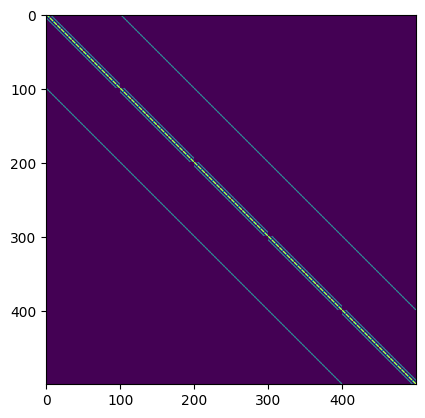

In [20]:
import matplotlib.pyplot as plt

plt.imshow((neutron_loss_matrix != 0))

print_matrix(neutron_loss_matrix)


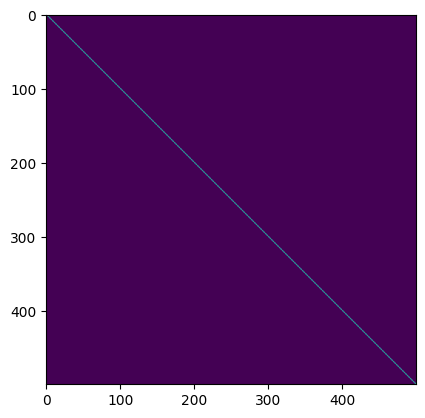

In [21]:
import matplotlib.pyplot as plt

plt.imshow(neutron_production_matrix != 0)

print_matrix(neutron_production_matrix)

In [22]:
from scipy.linalg import eig

eigenvalues, eigenvectors = eig(neutron_loss_matrix, neutron_production_matrix, check_finite=True)

In [23]:
def convert_flattened_flux_into_matrix(flattened_flux):
    matrix = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        index = get_index_in_flattened_flux_vector(energy, x, y, z)
        matrix[x, y, z, energy] = flattened_flux[index]
    return matrix

[[ 0.00167366 -0.0036812  -0.00516609 ... -0.04535364 -0.06031947
  -0.0004162 ]
 [ 0.00351141 -0.00772686 -0.01085093 ... -0.12472541 -0.03204232
  -0.01074836]
 [ 0.00418542 -0.00921105 -0.01293731 ... -0.05092183  0.0267679
   0.03621206]
 ...
 [ 0.00416596  0.00834039 -0.01308574 ... -0.00197219  0.07120305
  -0.05740742]
 [ 0.00348823  0.00698277 -0.0109539  ...  0.03335735 -0.03634757
  -0.09475878]
 [ 0.00166358  0.00332873 -0.00521847 ...  0.02603453 -0.05437221
  -0.07885392]]


/home/tom/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


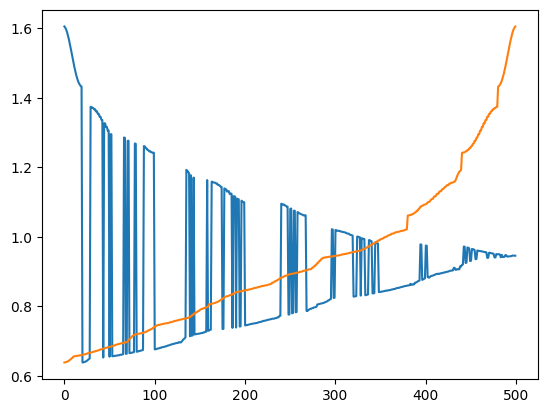

In [24]:
plt.plot(1 / np.array(eigenvalues))
plt.plot(sorted(1 / np.array(eigenvalues)))
print(eigenvectors)

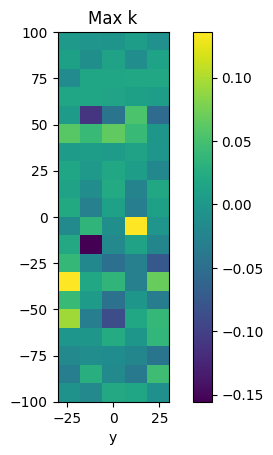

In [25]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, sharey=True)

predicted_flux = convert_flattened_flux_into_matrix(eigenvectors[np.argmin(eigenvalues)])
total_flux = predicted_flux[:, :, 0, 0].T
img1 = ax1.imshow(total_flux, extent=[-30, 30, -100, 100])

ax1.set_xlabel("x")
ax1.set_xlabel("y")
ax1.set_title("Max k")

fig.colorbar(img1)

In [26]:
# From stackoverflow
def gauss_seidel(A, b, tolerance, max_iterations, x):
    #x is the initial condition
    iter1 = 0
    #Iterate
    for k in range(max_iterations):
        iter1 = iter1 + 1
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        #LnormInf corresponds to the absolute value of the greatest element of the vector.
        
        LnormInf = max(abs((x - x_old)))/max(abs(x_old))   
        if  LnormInf < tolerance:
            break
    return x

# From openmc

def _check_convergence(s_n, s_o, k_n, k_o, iteration, innerits):
    """Checks the convergence of the CMFD problem

    Parameters
    ----------
    s_n : numpy.ndarray
        Source vector from current iteration
    s_o : numpy.ndarray
        Source vector from previous iteration
    k_n : float
        K-effective  from current iteration
    k_o : float
        K-effective from previous iteration
    iteration : int
        Iteration number
    innerits : int
        Number of iterations required for convergence in inner GS loop

    Returns
    -------
    iconv : bool
        Whether the power iteration has reached convergence
    serr : float
        Error in source from previous iteration to current iteration, used
        for dominance ratio calculations

    """
    # Calculate error in keff
    kerr = abs(k_o - k_n) / k_n

    # Calculate max error in source
    with np.errstate(divide='ignore', invalid='ignore'):
        serr = np.sqrt(np.sum(np.where(s_n > 0, ((s_n-s_o) / s_n)**2, 0))
                        / len(s_n))

    # Check for convergence
    iconv = kerr < 1.e-5 and serr < 1.e-4

    return iconv, serr

def _execute_power_iter(loss, prod):
    """Main power iteration routine for the CMFD calculation

    Parameters
    ----------
    loss : scipy.sparse.spmatrix
        Sparse matrix storing elements of CMFD loss matrix
    prod : scipy.sparse.spmatrix
        Sparse matrix storing elements of CMFD production matrix

    Returns
    -------
    phi_n : numpy.ndarray
        Flux vector of CMFD problem
    k_n : float
        Eigenvalue of CMFD problem
    dom : float
        Dominance ratio of CMFD problem

    """
    # Get problem size
    n = loss.shape[0]

    # Set up tolerances for C++ solver
    atoli = 1.e-10
    rtoli = 1.e-5
    toli = rtoli * 100

    # Set up flux vectors, intital guess set to 1
    phi_n = np.ones((n,))
    phi_o = np.ones((n,))

    # Set up source vectors
    s_n = np.zeros((n,))
    s_o = np.zeros((n,))

    # Set initial guess
    k_n = 1.5
    k_o = k_n
    dw = 1.e6
    k_s = k_o + dw
    k_ln = 1.0/(1.0/k_n - 1.0/k_s)
    k_lo = k_ln

    # Set norms to 0
    norm_n = 0.0
    norm_o = 0.0

    # Maximum number of power iterations
    maxits = 10000

    # Perform Wielandt shift
    loss -= 1.0/k_s*prod

    # Begin power iteration
    for i in range(maxits):
        if i % 20 == 0:
            print(f"Iteration {i}")
        # Check if reach max number of iterations
        if i == maxits - 1:
            raise RuntimeError('Reached maximum iterations in CMFD power '
                                'iteration solver.')

        # Compute source vector
        s_o = prod.dot(phi_o)

        # Normalize source vector
        s_o /= k_lo

        # Compute new flux with C++ solver
        innerits = gauss_seidel(loss, s_o, toli, 10000, phi_n)

        # Compute new source vector
        s_n = prod.dot(phi_n)

        # Compute new shifted eigenvalue
        k_ln = np.sum(s_n) / np.sum(s_o)

        # Compute new eigenvalue
        k_n = 1.0/(1.0/k_ln + 1.0/k_s)

        # Renormalize the old source
        s_o *= k_lo

        # Check convergence
        iconv, norm_n = _check_convergence(s_n, s_o, k_n, k_o, i+1, innerits)

        # If converged, calculate dominance ratio and break from loop
        if iconv:
            dom = norm_n / norm_o
            return phi_n, k_n, dom

        # Record old values if not converged
        phi_o = phi_n
        k_o = k_n
        k_lo = k_ln
        norm_o = norm_n

        # Update tolerance for inner iterations
        toli = max(atoli, rtoli*norm_n)

In [27]:
mc_flux, mc_k, dominance = _execute_power_iter(neutron_loss_matrix, neutron_production_matrix)

Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180
Iteration 200
Iteration 220
Iteration 240
Iteration 260
Iteration 280
Iteration 300
Iteration 320
Iteration 340
Iteration 360
Iteration 380
Iteration 400
Iteration 420
Iteration 440
Iteration 460
Iteration 480
Iteration 500
Iteration 520
Iteration 540
Iteration 560
Iteration 580
Iteration 600


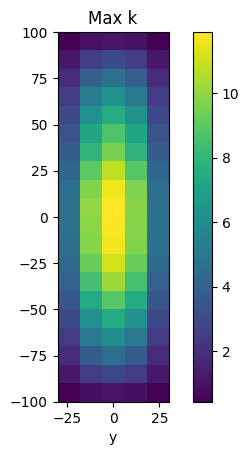

In [28]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, sharey=True)

predicted_flux = convert_flattened_flux_into_matrix(mc_flux)
total_flux = np.sum(predicted_flux[:, :, :, 0], axis=2).T
img1 = ax1.imshow(total_flux, extent=[-30, 30, -100, 100])

ax1.set_xlabel("x")
ax1.set_xlabel("y")
ax1.set_title("Max k")

fig.colorbar(img1)

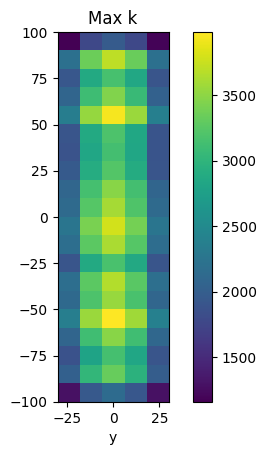

In [29]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, sharey=True)

total_flux = np.sum(flux_matrix[:, :, :, 0, 0, 0], axis=0)
img1 = ax1.imshow(total_flux, extent=[-30, 30, -100, 100])

ax1.set_xlabel("x")
ax1.set_xlabel("y")
ax1.set_title("Max k")

fig.colorbar(img1)